In [4]:
import pandas as pd
import  seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = sn.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

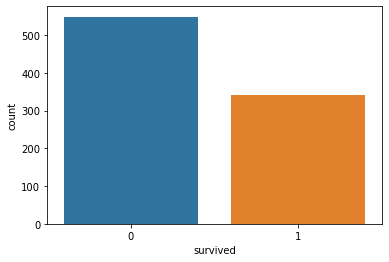

In [13]:
sn.countplot(df['survived'])

In [18]:
#data cleaning

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

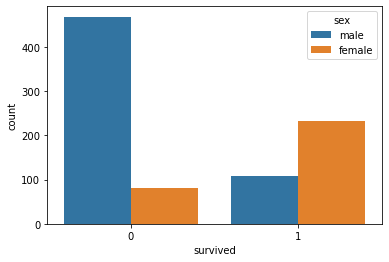

In [18]:
sn.countplot(x='survived',hue='sex',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

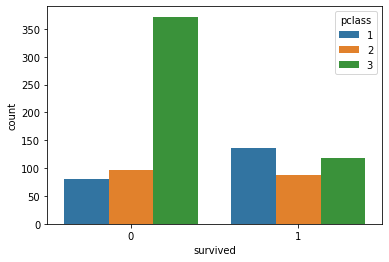

In [19]:
sn.countplot(x='survived',hue='pclass',data=df)

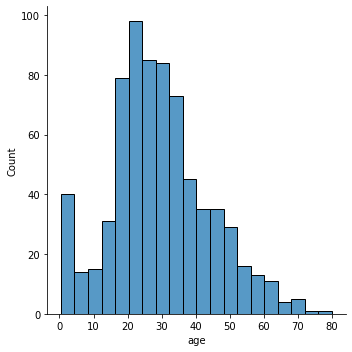

In [21]:
sn.displot(df['age'])

<AxesSubplot:xlabel='sibsp', ylabel='count'>

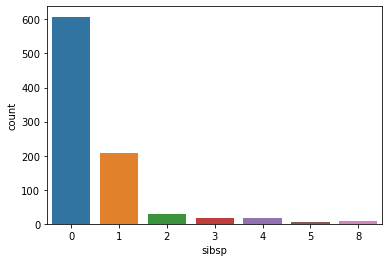

In [22]:
sn.countplot(x='sibsp',data=df)

<AxesSubplot:xlabel='pclass', ylabel='age'>

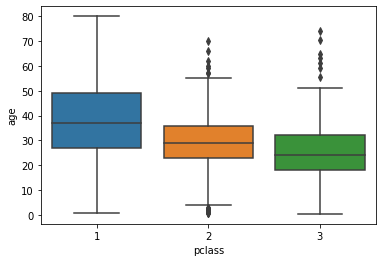

In [23]:
sn.boxplot(x='pclass',y='age',data=df)

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
df['sex']=lb.fit_transform(df['sex'])
df['who']=lb.fit_transform(df['who'])
df['adult_male']=lb.fit_transform(df['adult_male'])

In [28]:
dfs=df.drop(['class','embark_town','deck','alive','alone','who','adult_male'],axis=1)

In [29]:
dfs=dfs.dropna(subset= ['embarked'])

In [30]:
dfs.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [31]:
y=dfs.survived

In [32]:
x=dfs.drop('survived',axis=1)

In [33]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [34]:
dfs['embarked']=lb.fit_transform(dfs['embarked'])

In [35]:
dfs.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(dfs,y,test_size=.2,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [43]:
def models(xtrain,ytrain):
    
    #Linearn regression
    from sklearn.linear_model import LinearRegression
    LR=LinearRegression()
    LR.fit(xtrain,ytrain)
    
    #Logistic regression
    from sklearn.linear_model import LogisticRegression
    Lg=LogisticRegression()
    Lg.fit(xtrain,ytrain)
    
    #Decision tree
    from sklearn.tree import DecisionTreeClassifier
    gmodel=DecisionTreeClassifier('gini')
    emodel=DecisionTreeClassifier('entropy')
    gmodel.fit(xtrain,ytrain)
    emodel.fit(xtrain,ytrain)
    
    #kneighbour classifier
    from sklearn.neighbors import KNeighborsClassifier
    kn=KNeighborsClassifier()
    kn.fit(xtrain,ytrain)
    
    #naive bayes
    from sklearn.naive_bayes import GaussianNB
    gnb=GaussianNB()
    gnb.fit(xtrain,ytrain)
    
    # RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(xtrain, ytrain)
    
    #U SVC method linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(xtrain, ytrain)

    #Using SVC method rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(xtrain, ytrain)
    
    #print model accuracy on the training data.
    
    print('[0]Logistic Regression Training Accuracy:', Lg.score(xtrain, ytrain))
    print('[1]Linear Regression Training Accuracy:', LR.score(xtrain, ytrain))  
    print('[2]Decision Tree Classifier Training Accuracy:', emodel.score(xtrain, ytrain))   
    print('[3]Decision Tree Classifier Training Accuracy:', gmodel.score(xtrain, ytrain))   
    print('[4]KNeighbors Classifier Training Accuracy:', kn.score(xtrain, ytrain))    
    print('[5]naive bayes Training Accuracy:', gnb.score(xtrain, ytrain))   
    print('[6]RandomForestClassifier Training Accuracy:', forest.score(xtrain, ytrain))
    print('[6] svc linearTraining Accuracy:', svc_lin.score(xtrain, ytrain))
    print('[6] svc rbfTraining Accuracy:', svc_rbf.score(xtrain, ytrain))

    





    
    return svc_rbf, svc_lin, forest, gnb, kn, gmodel, emodel, LR, Lg
      
    
      
      
    
    
    


In [44]:
model=models(xtrain,ytrain)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').